In [6]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# 15-03-2022 T&T Lab

In [1]:
import pandas as pd

df = pd.read_csv(r"C:/Users/KIIT/Downloads/Automobile.csv")
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

### Missing Values of Price Column

In [7]:
df1= df[df['price'].notnull()]
df1

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Values from Price column into a numpy.ndarray

In [8]:
import numpy as np
arr = np.array(df.price)
print(arr)
type(arr)

[13495. 16500. 16500. 13950. 17450. 15250. 17710. 18920. 23875.    nan
 16430. 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.
  6575.  5572.  6377.  7957.  6229.  6692.  7609.  8558.  8921. 12964.
  6479.  6855.  5399.  6529.  7129.  7295.  7295.  7895.  9095.  8845.
 10295. 12945. 10345.  6785.    nan    nan 11048. 32250. 35550. 36000.
  5195.  6095.  6795.  6695.  7395. 10945. 11845. 13645. 15645.  8845.
  8495. 10595. 10245. 10795. 11245. 18280. 18344. 25552. 28248. 28176.
 31600. 34184. 35056. 40960. 45400. 16503.  5389.  6189.  6669.  7689.
  9959.  8499. 12629. 14869. 14489.  6989.  8189.  9279.  9279.  5499.
  7099.  6649.  6849.  7349.  7299.  7799.  7499.  7999.  8249.  8949.
  9549. 13499. 14399. 13499. 17199. 19699. 18399. 11900. 13200. 12440.
 13860. 15580. 16900. 16695. 17075. 16630. 17950. 18150.  5572.  7957.
  6229.  6692.  7609.  8921. 12764. 22018. 32528. 34028. 37028.    nan
  9295.  9895. 11850. 12170. 15040. 15510. 18150. 18620.  5118.  7053.
  7603

numpy.ndarray

In [10]:
min(arr)

5118.0

In [11]:
max(arr)

45400.0

In [22]:
x = df1.price.mean()
x

13207.129353233831

In [24]:
np.std(df1.price)

7927.272870751157

In [30]:
df.make.value_counts().index

Index(['toyota', 'nissan', 'mazda', 'honda', 'mitsubishi', 'subaru',
       'volkswagen', 'volvo', 'peugot', 'dodge', 'bmw', 'mercedes-benz',
       'plymouth', 'audi', 'saab', 'porsche', 'isuzu', 'jaguar', 'alfa-romero',
       'chevrolet', 'renault', 'mercury'],
      dtype='object')

In [34]:
df.make.value_counts().values

array([32, 18, 17, 13, 13, 12, 12, 11, 11,  9,  8,  8,  7,  7,  6,  5,  4,
        3,  3,  3,  2,  1], dtype=int64)

In [35]:
labels = ['toyota', 'nissan', 'mazda', 'honda', 'mitsubishi', 'subaru',
       'volkswagen', 'volvo', 'peugot', 'dodge', 'bmw', 'mercedes-benz',
       'plymouth', 'audi', 'saab', 'porsche', 'isuzu', 'jaguar', 'alfa-romero',
       'chevrolet', 'renault', 'mercury']
values = [32, 18, 17, 13, 13, 12, 12, 11, 11,  9,  8,  8,  7,  7,  6,  5,  4,
        3,  3,  3,  2,  1]

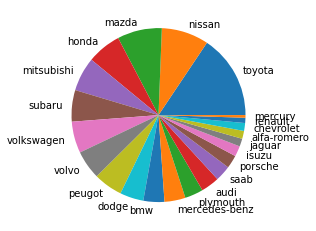

In [36]:
plt.pie(values, labels = labels)
plt.show() 

In [3]:
l1 = [1,2,3,4,5,6,7,8,9,10]
l1[2:1]

[]

In [1]:
print("Hello World")

Hello World


## 22-03-2022 Assignments

Write a Program to display first 10 records from a CSV or an excel file

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel(r"C:/Users/KIIT/Downloads/internal.xlsx")
df.head(10)

,Roll No,Internal Assessment
0,1022001,43
1,1022002,45
2,1022003,21
3,1022004,43
4,1022005,38
5,1022006,47
6,1022007,37
7,1022008,46
8,1022009,47
9,1022010,44


Write a Program to find number of record that contains NULL values in any of the column of CSV or 
an excel file and display those records.

In [15]:
df = pd.read_csv(r"C:/Users/KIIT/Documents/GE_HealthCare/Masked_Data_Set.csv")
df.head()

,SHIP_TO_UCMID,BILL_TO_UCMID,DATE_ORDERED,ORDER_STATUS,Item Number,SUB_MODALITY,QUANTITY,list price,selling Price,Total Sale USD,ORDER_METHOD
0,1,1,2018-02-06 00:00:00,CLOSED,KP46XF,NaN,1.0,65.0,65.0,65.0,DCOS OFFLINE
1,1,1,2018-02-06 00:00:00,CLOSED,KP46XF,NaN,2.0,65.0,65.0,130.0,DCOS OFFLINE
2,2,9277,2018-02-06 00:00:00,CLOSED,NG35CE,SKX,4.0,197.0,118.2,472.8,DCOS OFFLINE
3,3,7610,2018-02-19 00:00:00,CLOSED,LA26NR,SKX,2.0,170.0,55.0,110.0,DCOS OFFLINE
4,3,7610,2018-02-19 00:00:00,CLOSED,FF34UB,NaN,2.0,172.5,59.4,118.8,DCOS OFFLINE


In [16]:
df.isnull().sum()

SHIP_TO_UCMID          0
BILL_TO_UCMID          0
DATE_ORDERED           0
ORDER_STATUS           0
Item Number            0
SUB_MODALITY      489975
QUANTITY               0
list price             1
selling Price          0
Total Sale USD         0
ORDER_METHOD           0
dtype: int64

In [20]:
df[df['SUB_MODALITY'].isnull() | df['list price'].isnull()]

,SHIP_TO_UCMID,BILL_TO_UCMID,DATE_ORDERED,ORDER_STATUS,Item Number,SUB_MODALITY,QUANTITY,list price,selling Price,Total Sale USD,ORDER_METHOD
0,1,1,2018-02-06 00:00:00,CLOSED,KP46XF,NaN,1.0,65.0,65.00,65.00,DCOS OFFLINE
1,1,1,2018-02-06 00:00:00,CLOSED,KP46XF,NaN,2.0,65.0,65.00,130.00,DCOS OFFLINE
4,3,7610,2018-02-19 00:00:00,CLOSED,FF34UB,NaN,2.0,172.5,59.40,118.80,DCOS OFFLINE
5,3,7610,2018-02-19 00:00:00,CLOSED,JC26AL,NaN,1.0,160.0,52.50,52.50,DCOS OFFLINE
6,3,7610,2018-02-19 00:00:00,CLOSED,AP77OO,NaN,1.0,165.0,53.75,53.75,DCOS OFFLINE
...,...,...,...,...,...,...,...,...,...,...,...
1358158,3658,2006,2021-07-25 00:00:00,AWAITING_SHIPPING,DR64UA,NaN,1.0,99.0,61.38,61.38,SERVICE SHOP
1358159,231,2805,2021-07-25 00:00:00,AWAITING_SHIPPING,UG33SE,NaN,1.0,54.0,54.00,54.00,SERVICE SHOP
1358160,231,2805,2021-07-25 00:00:00,AWAITING_SHIPPING,RL88GD,NaN,1.0,77.0,77.00,77.00,SERVICE SHOP
1358162,3658,2006,2021-07-25 00:00:00,AWAITING_SHIPPING,UW64HR,NaN,2.0,100.0,64.00,128.00,SERVICE SHOP


 Write a program to evaluate the grade of the student from the following three excel file
 
i. First file contains internal mark (50)

ii. 2nd file contains end semester mark for section -A(14)

iii. 3rd file contains end semester mark for Section B mark(36)

In [21]:
df1 = pd.read_excel(r"C:/Users/KIIT/Downloads/internal.xlsx")
df2 = pd.read_excel(r"C:/Users/KIIT/Downloads/SEC A.xlsx")
df3 = pd.read_excel(r"C:/Users/KIIT/Downloads/SECB.xlsx")

In [22]:
df1.head()

,Roll No,Internal Assessment
0,1022001,43
1,1022002,45
2,1022003,21
3,1022004,43
4,1022005,38


In [23]:
df2.head()

,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,Q. 7 /2.00
0,1022001.0,1022001.0,2.00,2.0,0.0,2.0,0.00,0.0,2.00
1,1022002.0,1022002.0,0.00,2.0,2.0,2.0,0.00,2.0,2.00
2,1022003.0,1022003.0,2.00,0.0,0.0,0.0,2.00,0.0,0.00
3,1022004.0,1022004.0,2.00,0.0,0.0,2.0,2.00,2.0,0.00
4,1022005.0,1022005.0,2.00,2.0,2.0,2.0,-,0.0,2.00


In [24]:
df3.head()

,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00
0,1022114,1022114,0.00,0.00,0.00,0.00
1,1022255,1022255,-,-,-,-
2,1022242,1022242,-,-,-,-
3,1022246,1022246,-,-,-,-
4,1022148,1022148,1.00,3.00,4.00,-


In [28]:
marks = pd.concat([df1,df2,df3],axis=1)
marks

,Roll No,Internal Assessment,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,Q. 7 /2.00,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00
0,1022001,43,1022001.0,1022001.0,2.00,2.00,0.00,2.00,0.00,0.00,2.00,1022114.0,1022114.0,0.00,0.00,0.00,0.00
1,1022002,45,1022002.0,1022002.0,0.00,2.00,2.00,2.00,0.00,2.00,2.00,1022255.0,1022255.0,-,-,-,-
2,1022003,21,1022003.0,1022003.0,2.00,0.00,0.00,0.00,2.00,0.00,0.00,1022242.0,1022242.0,-,-,-,-
3,1022004,43,1022004.0,1022004.0,2.00,0.00,0.00,2.00,2.00,2.00,0.00,1022246.0,1022246.0,-,-,-,-
4,1022005,38,1022005.0,1022005.0,2.00,2.00,2.00,2.00,-,0.00,2.00,1022148.0,1022148.0,1.00,3.00,4.00,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1022305,37,1022307.0,1022307.0,0.00,0.00,0.00,2.00,0.00,2.00,2.00,1022201.0,1022201.0,11.00,12.00,9.00,12.00
246,1022306,49,1022308.0,1022308.0,-,0.00,0.00,2.00,0.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
247,1022307,43,1022309.0,1022309.0,2.00,0.00,0.00,2.00,2.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
248,1022308,42,NaN,NaN,1.32,0.81,0.66,1.71,1.34,1.12,1.49,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
print(marks.dtypes)

Roll No                  int64
Internal Assessment      int64
First name             float64
Username               float64
Q. 1 /2.00              object
Q. 2 /2.00             float64
Q. 3 /2.00             float64
Q. 4 /2.00             float64
Q. 5 /2.00              object
Q. 6 /2.00             float64
Q. 7 /2.00              object
First name             float64
Username               float64
Q. 1 /12.00             object
Q. 2 /12.00             object
Q. 3 /12.00             object
Q. 4 /12.00             object
dtype: object


In [40]:
float(marks['Q. 1 /2.00'][0])

2.0

In [46]:
marks = marks.fillna(0)
marks

,Roll No,Internal Assessment,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,Q. 7 /2.00,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00
0,1022001,43,1022001.0,1022001.0,2.00,2.00,0.00,2.00,0.00,0.00,2.00,1022114.0,1022114.0,0.00,0.00,0.00,0.00
1,1022002,45,1022002.0,1022002.0,0.00,2.00,2.00,2.00,0.00,2.00,2.00,1022255.0,1022255.0,-,-,-,-
2,1022003,21,1022003.0,1022003.0,2.00,0.00,0.00,0.00,2.00,0.00,0.00,1022242.0,1022242.0,-,-,-,-
3,1022004,43,1022004.0,1022004.0,2.00,0.00,0.00,2.00,2.00,2.00,0.00,1022246.0,1022246.0,-,-,-,-
4,1022005,38,1022005.0,1022005.0,2.00,2.00,2.00,2.00,-,0.00,2.00,1022148.0,1022148.0,1.00,3.00,4.00,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1022305,37,1022307.0,1022307.0,0.00,0.00,0.00,2.00,0.00,2.00,2.00,1022201.0,1022201.0,11.00,12.00,9.00,12.00
246,1022306,49,1022308.0,1022308.0,-,0.00,0.00,2.00,0.00,2.00,0.00,0.0,0.0,0,0,0,0
247,1022307,43,1022309.0,1022309.0,2.00,0.00,0.00,2.00,2.00,0.00,0.00,0.0,0.0,0,0,0,0
248,1022308,42,0.0,0.0,1.32,0.81,0.66,1.71,1.34,1.12,1.49,0.0,0.0,0,0,0,0


In [50]:
marks['Q. 1 /12.00'] = marks['Q. 1 /12.00'].replace(['-'],'0')

In [52]:
marks['Q. 1 /2.00'] = marks['Q. 1 /2.00'].replace(['-'],'0')

In [53]:
marks['Q. 2 /12.00'] = marks['Q. 2 /12.00'].replace(['-'],'0')
marks['Q. 2 /2.00'] = marks['Q. 2 /2.00'].replace(['-'],'0')

In [54]:
marks['Q. 3 /12.00'] = marks['Q. 3 /12.00'].replace(['-'],'0')
marks['Q. 3 /2.00'] = marks['Q. 3 /2.00'].replace(['-'],'0')

In [55]:
marks['Q. 4 /12.00'] = marks['Q. 4 /12.00'].replace(['-'],'0')
marks['Q. 4 /2.00'] = marks['Q. 4 /2.00'].replace(['-'],'0')

In [57]:
marks['Q. 5 /2.00'] = marks['Q. 5 /2.00'].replace(['-'],'0')

In [58]:
marks['Q. 6 /2.00'] = marks['Q. 6 /2.00'].replace(['-'],'0')

In [62]:
marks['Q. 7 /2.00'] = marks['Q. 7 /2.00'].replace(['-'],'0')

In [59]:
marks

,Roll No,Internal Assessment,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,Q. 7 /2.00,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00
0,1022001,43,1022001.0,1022001.0,2.00,2.00,0.00,2.00,0.00,0.00,2.00,1022114.0,1022114.0,0.00,0.00,0.00,0.00
1,1022002,45,1022002.0,1022002.0,0.00,2.00,2.00,2.00,0.00,2.00,2.00,1022255.0,1022255.0,0,0,0,0
2,1022003,21,1022003.0,1022003.0,2.00,0.00,0.00,0.00,2.00,0.00,0.00,1022242.0,1022242.0,0,0,0,0
3,1022004,43,1022004.0,1022004.0,2.00,0.00,0.00,2.00,2.00,2.00,0.00,1022246.0,1022246.0,0,0,0,0
4,1022005,38,1022005.0,1022005.0,2.00,2.00,2.00,2.00,0,0.00,2.00,1022148.0,1022148.0,1.00,3.00,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1022305,37,1022307.0,1022307.0,0.00,0.00,0.00,2.00,0.00,2.00,2.00,1022201.0,1022201.0,11.00,12.00,9.00,12.00
246,1022306,49,1022308.0,1022308.0,0,0.00,0.00,2.00,0.00,2.00,0.00,0.0,0.0,0,0,0,0
247,1022307,43,1022309.0,1022309.0,2.00,0.00,0.00,2.00,2.00,0.00,0.00,0.0,0.0,0,0,0,0
248,1022308,42,0.0,0.0,1.32,0.81,0.66,1.71,1.34,1.12,1.49,0.0,0.0,0,0,0,0


In [60]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Roll No              250 non-null    int64  
 1   Internal Assessment  250 non-null    int64  
 2   First name           250 non-null    float64
 3   Username             250 non-null    float64
 4   Q. 1 /2.00           250 non-null    object 
 5   Q. 2 /2.00           250 non-null    float64
 6   Q. 3 /2.00           250 non-null    float64
 7   Q. 4 /2.00           250 non-null    float64
 8   Q. 5 /2.00           250 non-null    object 
 9   Q. 6 /2.00           250 non-null    float64
 10  Q. 7 /2.00           250 non-null    object 
 11  First name           250 non-null    float64
 12  Username             250 non-null    float64
 13  Q. 1 /12.00          250 non-null    object 
 14  Q. 2 /12.00          250 non-null    object 
 15  Q. 3 /12.00          250 non-null    obj

In [63]:
marks['Q. 1 /2.00'] = marks['Q. 1 /2.00'].astype(float)
marks['Q. 5 /2.00'] = marks['Q. 5 /2.00'].astype(float)
marks['Q. 7 /2.00'] = marks['Q. 7 /2.00'].astype(float)
marks['Q. 1 /12.00'] = marks['Q. 1 /12.00'].astype(float)
marks['Q. 2 /12.00'] = marks['Q. 2 /12.00'].astype(float)
marks['Q. 3 /12.00'] = marks['Q. 3 /12.00'].astype(float)
marks['Q. 4 /12.00'] = marks['Q. 4 /12.00'].astype(float)

In [65]:
marks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Roll No              250 non-null    int64  
 1   Internal Assessment  250 non-null    int64  
 2   First name           250 non-null    float64
 3   Username             250 non-null    float64
 4   Q. 1 /2.00           250 non-null    float64
 5   Q. 2 /2.00           250 non-null    float64
 6   Q. 3 /2.00           250 non-null    float64
 7   Q. 4 /2.00           250 non-null    float64
 8   Q. 5 /2.00           250 non-null    float64
 9   Q. 6 /2.00           250 non-null    float64
 10  Q. 7 /2.00           250 non-null    float64
 11  First name           250 non-null    float64
 12  Username             250 non-null    float64
 13  Q. 1 /12.00          250 non-null    float64
 14  Q. 2 /12.00          250 non-null    float64
 15  Q. 3 /12.00          250 non-null    flo

In [66]:
secA = marks['Q. 1 /2.00']+marks['Q. 2 /2.00']+marks['Q. 3 /2.00']+marks['Q. 4 /2.00']+marks['Q. 5 /2.00']+marks['Q. 6 /2.00']+marks['Q. 7 /2.00']

In [68]:
marks['SECA'] = secA
marks.head()

,Roll No,Internal Assessment,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,Q. 7 /2.00,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00,SECA
0,1022001,43,1022001.0,1022001.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,1022114.0,1022114.0,0.0,0.0,0.0,0.0,8.0
1,1022002,45,1022002.0,1022002.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,1022255.0,1022255.0,0.0,0.0,0.0,0.0,10.0
2,1022003,21,1022003.0,1022003.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1022242.0,1022242.0,0.0,0.0,0.0,0.0,4.0
3,1022004,43,1022004.0,1022004.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,1022246.0,1022246.0,0.0,0.0,0.0,0.0,8.0
4,1022005,38,1022005.0,1022005.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1022148.0,1022148.0,1.0,3.0,4.0,0.0,10.0


In [70]:
secB = marks['Q. 1 /12.00']+marks['Q. 2 /12.00']+marks['Q. 3 /12.00']+marks['Q. 4 /12.00']
marks['SECB'] = secB
marks.head()

,Roll No,Internal Assessment,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,Q. 7 /2.00,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00,SECA,SECB
0,1022001,43,1022001.0,1022001.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,1022114.0,1022114.0,0.0,0.0,0.0,0.0,8.0,0.0
1,1022002,45,1022002.0,1022002.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,1022255.0,1022255.0,0.0,0.0,0.0,0.0,10.0,0.0
2,1022003,21,1022003.0,1022003.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1022242.0,1022242.0,0.0,0.0,0.0,0.0,4.0,0.0
3,1022004,43,1022004.0,1022004.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,1022246.0,1022246.0,0.0,0.0,0.0,0.0,8.0,0.0
4,1022005,38,1022005.0,1022005.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1022148.0,1022148.0,1.0,3.0,4.0,0.0,10.0,8.0


In [71]:
total = marks['Internal Assessment'] + marks['SECA'] + marks['SECB']
total

0      51.00
1      55.00
2      25.00
3      51.00
4      56.00
       ...  
245    87.00
246    53.00
247    49.00
248    50.45
249    14.00
Length: 250, dtype: float64

In [72]:
marks['Total'] = total
marks

,Roll No,Internal Assessment,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,Q. 7 /2.00,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00,SECA,SECB,Total
0,1022001,43,1022001.0,1022001.0,2.00,2.00,0.00,2.00,0.00,0.00,2.00,1022114.0,1022114.0,0.0,0.0,0.0,0.0,8.00,0.0,51.00
1,1022002,45,1022002.0,1022002.0,0.00,2.00,2.00,2.00,0.00,2.00,2.00,1022255.0,1022255.0,0.0,0.0,0.0,0.0,10.00,0.0,55.00
2,1022003,21,1022003.0,1022003.0,2.00,0.00,0.00,0.00,2.00,0.00,0.00,1022242.0,1022242.0,0.0,0.0,0.0,0.0,4.00,0.0,25.00
3,1022004,43,1022004.0,1022004.0,2.00,0.00,0.00,2.00,2.00,2.00,0.00,1022246.0,1022246.0,0.0,0.0,0.0,0.0,8.00,0.0,51.00
4,1022005,38,1022005.0,1022005.0,2.00,2.00,2.00,2.00,0.00,0.00,2.00,1022148.0,1022148.0,1.0,3.0,4.0,0.0,10.00,8.0,56.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1022305,37,1022307.0,1022307.0,0.00,0.00,0.00,2.00,0.00,2.00,2.00,1022201.0,1022201.0,11.0,12.0,9.0,12.0,6.00,44.0,87.00
246,1022306,49,1022308.0,1022308.0,0.00,0.00,0.00,2.00,0.00,2.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.00,0.0,53.00
247,1022307,43,1022309.0,1022309.0,2.00,0.00,0.00,2.00,2.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,6.00,0.0,49.00
248,1022308,42,0.0,0.0,1.32,0.81,0.66,1.71,1.34,1.12,1.49,0.0,0.0,0.0,0.0,0.0,0.0,8.45,0.0,50.45


In [83]:
a = []
for i in marks['Total']:
    if(i<40):
        a.append("Fail")
    elif(i>=40 and i<=50):
        a.append('D')
    elif(i>50 and i<=60):
        a.append('C')
    elif(i>60 and i<=70):
        a.append('B')
    elif(i>70 and i<=80):
        a.append('A')
    elif(i>80 and i<90):
        a.append('E')
    elif(i>=90):
        a.append('O')
a

['C',
 'C',
 'Fail',
 'C',
 'C',
 'B',
 'C',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'C',
 'A',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'B',
 'B',
 'A',
 'B',
 'B',
 'A',
 'E',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'B',
 'B',
 'B',
 'Fail',
 'A',
 'A',
 'A',
 'A',
 'B',
 'C',
 'A',
 'B',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'B',
 'B',
 'A',
 'E',
 'A',
 'B',
 'A',
 'B',
 'B',
 'A',
 'A',
 'B',
 'A',
 'A',
 'C',
 'A',
 'B',
 'B',
 'A',
 'B',
 'B',
 'D',
 'A',
 'B',
 'E',
 'A',
 'A',
 'B',
 'B',
 'A',
 'E',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'Fail',
 'A',
 'E',
 'A',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'A',
 'E',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'B',
 'B',
 'B',
 'A',
 'E',
 'E',
 'E',
 'A',
 'A',
 'B',
 'B',
 'A',
 'A',
 'B',
 'A',
 'B',
 'E',
 'E',
 'E',
 'A',
 'A',
 'A',
 'A',
 'A',
 'E',
 'E',
 'E',
 'A',
 'A',
 'A',
 'A',
 'E',
 

In [84]:
marks['Grades'] = a

In [85]:
marks

,Roll No,Internal Assessment,First name,Username,Q. 1 /2.00,Q. 2 /2.00,Q. 3 /2.00,Q. 4 /2.00,Q. 5 /2.00,Q. 6 /2.00,...,First name,Username,Q. 1 /12.00,Q. 2 /12.00,Q. 3 /12.00,Q. 4 /12.00,SECA,SECB,Total,Grades
0,1022001,43,1022001.0,1022001.0,2.00,2.00,0.00,2.00,0.00,0.00,...,1022114.0,1022114.0,0.0,0.0,0.0,0.0,8.00,0.0,51.00,C
1,1022002,45,1022002.0,1022002.0,0.00,2.00,2.00,2.00,0.00,2.00,...,1022255.0,1022255.0,0.0,0.0,0.0,0.0,10.00,0.0,55.00,C
2,1022003,21,1022003.0,1022003.0,2.00,0.00,0.00,0.00,2.00,0.00,...,1022242.0,1022242.0,0.0,0.0,0.0,0.0,4.00,0.0,25.00,Fail
3,1022004,43,1022004.0,1022004.0,2.00,0.00,0.00,2.00,2.00,2.00,...,1022246.0,1022246.0,0.0,0.0,0.0,0.0,8.00,0.0,51.00,C
4,1022005,38,1022005.0,1022005.0,2.00,2.00,2.00,2.00,0.00,0.00,...,1022148.0,1022148.0,1.0,3.0,4.0,0.0,10.00,8.0,56.00,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1022305,37,1022307.0,1022307.0,0.00,0.00,0.00,2.00,0.00,2.00,...,1022201.0,1022201.0,11.0,12.0,9.0,12.0,6.00,44.0,87.00,E
246,1022306,49,1022308.0,1022308.0,0.00,0.00,0.00,2.00,0.00,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,4.00,0.0,53.00,C
247,1022307,43,1022309.0,1022309.0,2.00,0.00,0.00,2.00,2.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,6.00,0.0,49.00,D
248,1022308,42,0.0,0.0,1.32,0.81,0.66,1.71,1.34,1.12,...,0.0,0.0,0.0,0.0,0.0,0.0,8.45,0.0,50.45,C


In [90]:
arr = np.array([1,2,3,4])
arr*3

array([ 1,  8, 27, 64], dtype=int32)

Write a program to read the internal mark, external mark, total from the excel file used in program 3 
and evaluate the grade and then export internal , external total mark and Grade into a new excel 
file.

In [91]:
d1 = {"Internal" : marks['Internal Assessment'],
     "SEC A" : marks['SECA'],
     "SEC B" : marks['SECB'],
     "Total" : marks['Total'],
     "Grades" : marks['Grades']}
d1

{'Internal': 0      43
 1      45
 2      21
 3      43
 4      38
        ..
 245    37
 246    49
 247    43
 248    42
 249    14
 Name: Internal Assessment, Length: 250, dtype: int64,
 'SEC A': 0       8.00
 1      10.00
 2       4.00
 3       8.00
 4      10.00
        ...  
 245     6.00
 246     4.00
 247     6.00
 248     8.45
 249     0.00
 Name: SECA, Length: 250, dtype: float64,
 'SEC B': 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       8.0
        ... 
 245    44.0
 246     0.0
 247     0.0
 248     0.0
 249     0.0
 Name: SECB, Length: 250, dtype: float64,
 'Total': 0      51.00
 1      55.00
 2      25.00
 3      51.00
 4      56.00
        ...  
 245    87.00
 246    53.00
 247    49.00
 248    50.45
 249    14.00
 Name: Total, Length: 250, dtype: float64,
 'Grades': 0         C
 1         C
 2      Fail
 3         C
 4         C
        ... 
 245       E
 246       C
 247       D
 248       C
 249    Fail
 Name: Grades, Length: 250, dtype: object}

In [93]:
new_df = pd.DataFrame(d1)
new_df

,Internal,SEC A,SEC B,Total,Grades
0,43,8.00,0.0,51.00,C
1,45,10.00,0.0,55.00,C
2,21,4.00,0.0,25.00,Fail
3,43,8.00,0.0,51.00,C
4,38,10.00,8.0,56.00,C
...,...,...,...,...,...
245,37,6.00,44.0,87.00,E
246,49,4.00,0.0,53.00,C
247,43,6.00,0.0,49.00,D
248,42,8.45,0.0,50.45,C


In [96]:
new_df.to_excel("Grades.xlsx")

In [98]:
df = pd.read_csv(r"C:/Users/KIIT/Downloads/company_sales_data.csv")
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


Read Total profit of all months and show it using a line plot

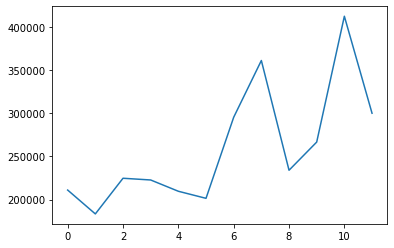

In [99]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(df['total_profit'])
plt.show()

Get total profit of all
months and show line plot with the following Style properties Generated line plot must include
following Style properties: – Line Style dotted and Line-color should be red Show legend at the
lower right location. X label name = Month Number Y label name = Sold units number Add a
circle marker. Line marker color as read Line width should be 3

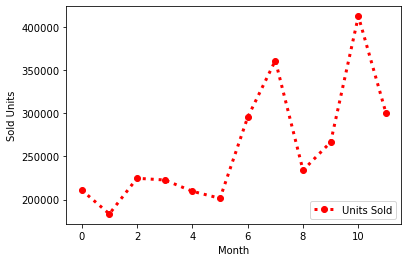

In [105]:
plt.plot(df['total_profit'],color='red', linestyle='dotted',marker='o',linewidth=3)
plt.legend(['Units Sold'],loc='lower right')
plt.xlabel("Month")
plt.ylabel("Sold Units")
plt.show()

 Read all product
sales data and show it using a multiline plot Display the number of units sold per month for each
product using multiline plots. (i.e., Separate Plotline for each product )

In [106]:
df

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


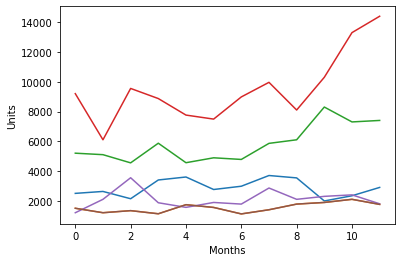

In [109]:
l1 = df['facecream']
l2 = df['facewash']
l3 = df['toothpaste']
l4 = df['bathingsoap']
l5 = df['shampoo']
l6 = df['moisturizer']
plt.plot(l1)
plt.plot(l2)
plt.plot(l3)
plt.plot(l4)
plt.plot(l5)
plt.plot(l6)
plt.xlabel('Months')
plt.ylabel('Units')
plt.show()

Read
toothpaste sales data of each month and show it using a scatter plot

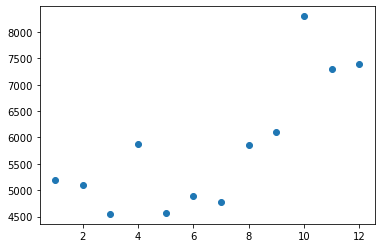

In [110]:
plt.scatter(x=[1,2,3,4,5,6,7,8,9,10,11,12],y=df.toothpaste)
plt.show()